Mean Squared Error: 0.5466964419580572
R-squared (R2) Score: 0.2597673129790179


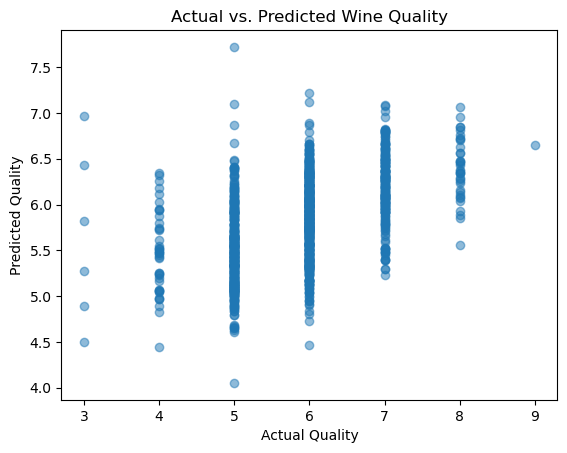

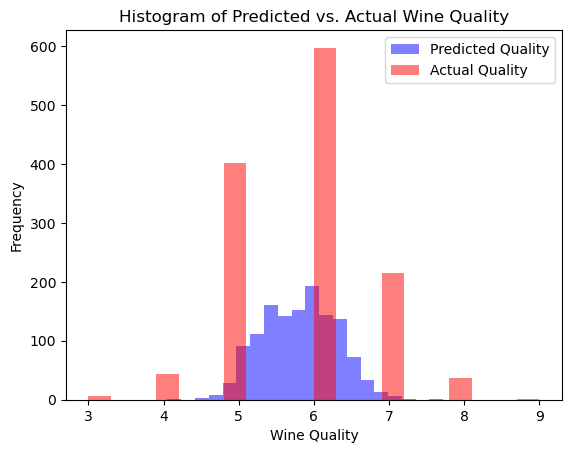

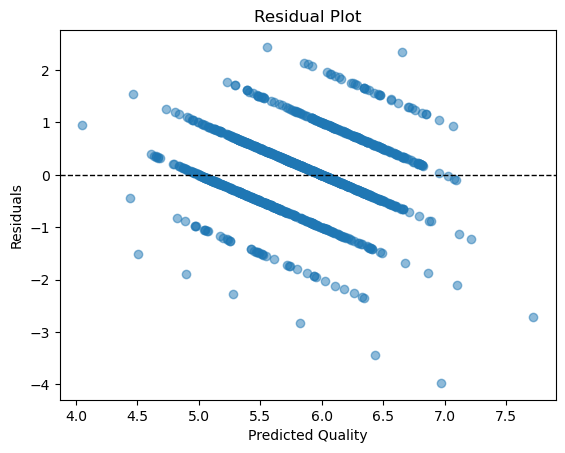

Feature importance is not available for this model.


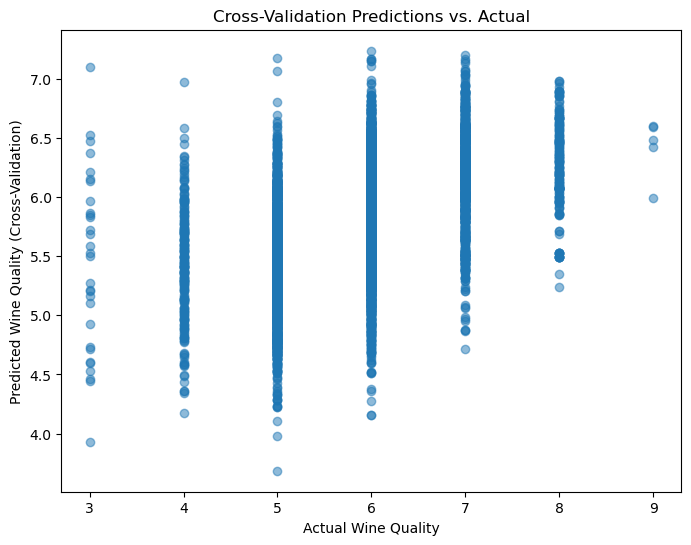

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the red wine dataset
red_wine = pd.read_csv("winequality-red.csv", sep=";")

# Load the white wine dataset
white_wine = pd.read_csv("winequality-white.csv", sep=";")

# Add a 'wine_type' column to identify the wine type
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

# Concatenate the red and white wine datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Prepare the data
X = wine_data.drop(['quality', 'wine_type'], axis=1)  # Features
y = wine_data['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs. Predicted Wine Quality")
plt.show()

# Histogram of Predictions
plt.hist(y_pred, bins=20, alpha=0.5, color='blue', label='Predicted Quality')
plt.hist(y_test, bins=20, alpha=0.5, color='red', label='Actual Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Predicted vs. Actual Wine Quality')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot')
plt.show()

# Feature Importance (assuming you have a more complex model)
# Replace 'model' with your actual model if it supports feature importance
try:
    feature_importance = model.feature_importances_
    feature_names = X.columns
    sorted_idx = np.argsort(feature_importance)

    plt.barh(range(len(feature_names)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(feature_names)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()
except AttributeError:
    print("Feature importance is not available for this model.")

# Cross-Validation Performance
from sklearn.model_selection import cross_val_predict

y_cv_pred = cross_val_predict(model, X, y, cv=5)  # Perform cross-validation predictions

plt.figure(figsize=(8, 6))
plt.scatter(y, y_cv_pred, alpha=0.5)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality (Cross-Validation)')
plt.title('Cross-Validation Predictions vs. Actual')
plt.show()
